# Building Models for Log Curve Prediction

Importing numpy and pandas

In [13]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

Reading in the 

***The `wl_path` variable must be updated with the filepath to `all_synthetic_well_logs.csv` on your machine***

In [5]:
#This is where it's located on my machine! 
wl_path = 'E:/all_synthetic_well_logs.csv'

data = pd.read_csv(wl_path)

data.head()

,Unnamed: 0,DTC,DTS,RHOB,depth,well,x,y
0,0,NaN,NaN,NaN,0.00,6782,8476.25,0.0
1,1,NaN,NaN,NaN,1.25,6782,8476.25,0.0
2,2,NaN,NaN,NaN,2.50,6782,8476.25,0.0
3,3,NaN,NaN,NaN,3.75,6782,8476.25,0.0
4,4,NaN,NaN,NaN,5.00,6782,8476.25,0.0


`dropna` gets rid of all rows that are missing data

In [6]:
data.dropna(inplace=True)

Here we will train the first linear regression model



In [7]:
from sklearn import linear_model

#These are the features - independent variables / abscissa
features = ['DTC', 'depth','RHOB', 'x', 'y']

#Target variable - dependent variable / ordinate
target = ['DTS']

#Just for demonstration, using well 1000 for training the model (fitting the line)
#Using well 1 for evaluating/testing the best fit line
test = data[data.well == 1]
train_sample = data[data.well == 1000]

#Here we are selecting the proper columns for training and evaluating the model
X = train_sample[features]
y = train_sample[target]

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


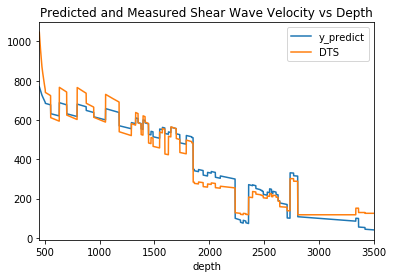

In [9]:
#These two lines create the linear regression model and fit it to the data contained in X and y 
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X, y)

#The regression model we created up above has a 'predict' function attached to it that lets us submit more data 
#The regression model will return a value that 
#Here we submit a whole well. We have the true values for this well, so we can graph them both and see
#how well the regression fits
y_test_pred = reg.predict(test[features])
test['y_predict'] = y_test_pred
#test_curve.head()
ax = test[['y_predict', 'DTS', 'depth']].plot(x='depth', title='Predicted and Measured Shear Wave Velocity vs Depth')

In [11]:
from sklearn.metrics import mean_squared_error

#Looking at the mean squared error between the predicted values and the score
mean_squared_error(y_test_pred, test.DTS)

2264.2398213468487

Here we are taking a random pair of wells and fitting to one, then 

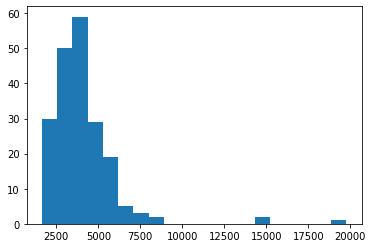

In [19]:
perf= []

for x in range(200):
    welln = random.randint(1,13601)
    welln_test = random.randint(1,13601)
    train = data[data.well == welln]
    test = data[data.well == welln_test]
    X, y = train[features], train[target]
    X_test, y_test = test[features], test[target]
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(X, y.values.ravel())
    perf.append(mean_squared_error(reg.predict(X_test), y_test.values.ravel()))

hist_args = plt.hist(perf, bins=20)

Here we look at how the 

This gives us a sense of how much more complex our , and also whether our linear regression. Essentially if our model is complex enough, the .

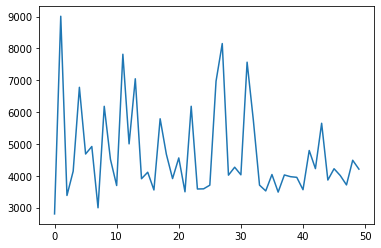

In [22]:
data[data.well.isin([1,2,3,4])]


perf_curve = []

for x in range(1,51):
    welln = random.randint(1,13601)
    welln_test = random.sample(range(1,13601), x)
    train = data[data.well == welln]
    test = data[data.well.isin(welln_test)]
    X, y = train[features], train[target]
    X_test, y_test = test[features], test[target]
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(X, y.values.ravel())
    perf_curve.append(mean_squared_error(reg.predict(X_test), y_test.values.ravel()))

hist_args = plt.plot(perf_curve)

# End Linear Regression, Begin Gradient Boosting Regressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
import random

perf = []

for x in range(500):
    welln = random.randint(1,13601)
    welln_test = random.randint(1,13601)
    train = data[data.well == welln]
    test = data[data.well == welln_test]
    X, y = train[features], train[target]
    X_test, y_test = test[features], test[target]
    gbr_reg = GradientBoostingRegressor()
    gbr_reg.fit(X, y.values.ravel())
    perf.append(mean_squared_error(gbr_reg.predict(X_test), y_test.values.ravel()))



(array([268., 124.,  39.,  31.,  18.,   5.,   2.,   3.,   2.,   0.,   3.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([2.24217099e+00, 7.63934172e+02, 1.52562617e+03, 2.28731817e+03,
        3.04901017e+03, 3.81070218e+03, 4.57239418e+03, 5.33408618e+03,
        6.09577818e+03, 6.85747018e+03, 7.61916218e+03, 8.38085418e+03,
        9.14254618e+03, 9.90423818e+03, 1.06659302e+04, 1.14276222e+04,
        1.21893142e+04, 1.29510062e+04, 1.37126982e+04, 1.44743902e+04,
        1.52360822e+04]),
 <a list of 20 Patch objects>)

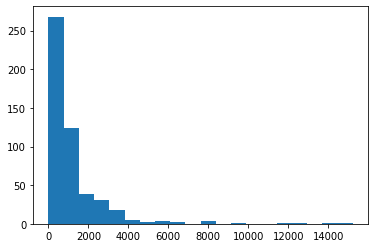

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(perf, bins=20)


In [30]:
#Just for demonstration, using well 1000 for training the model (fitting the line)
#Using well 1 for evaluating/testing the best fit line
test = data[data.well == 1]
train_sample = data[data.well == 1000]

#Here we are selecting the proper columns for training and evaluating the model
X = train_sample[features]
y = train_sample[target]

gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X, y)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


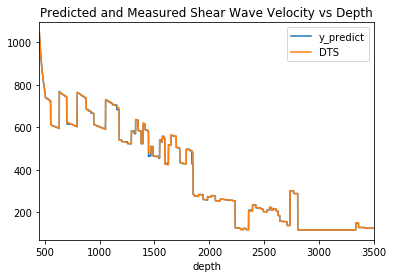

In [31]:
y_test_pred = gbr_reg.predict(test[features])
test['y_predict'] = y_test_pred
#test_curve.head()
test[['y_predict', 'DTS', 'depth']].plot(x='depth', title='Predicted and Measured Shear Wave Velocity vs Depth')

In [32]:
mean_squared_error(y_test_pred, test.DTS)

18.27767643053777

NameError: name 'curves' is not defined

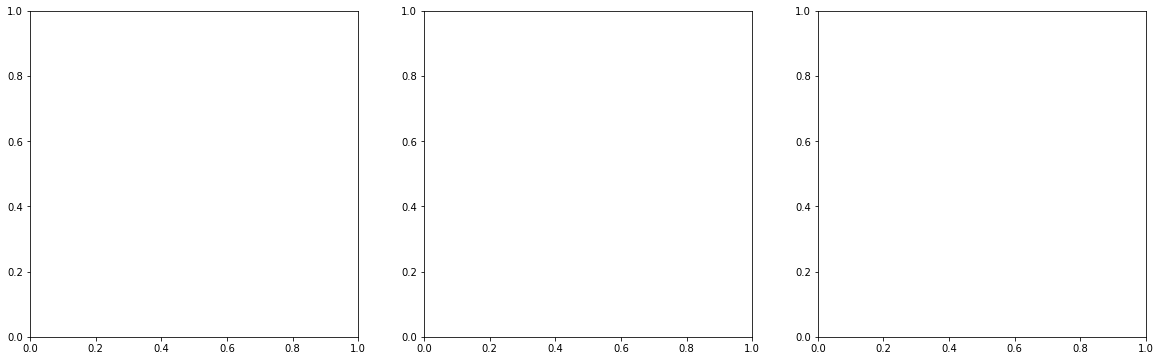

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

curves['1'].DTC.plot(ax=ax1)
curves['1'].DTS.plot(ax=ax2, color='green')
curves['1'].RHOB.plot(ax=ax3, color='red')
fig.show()

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


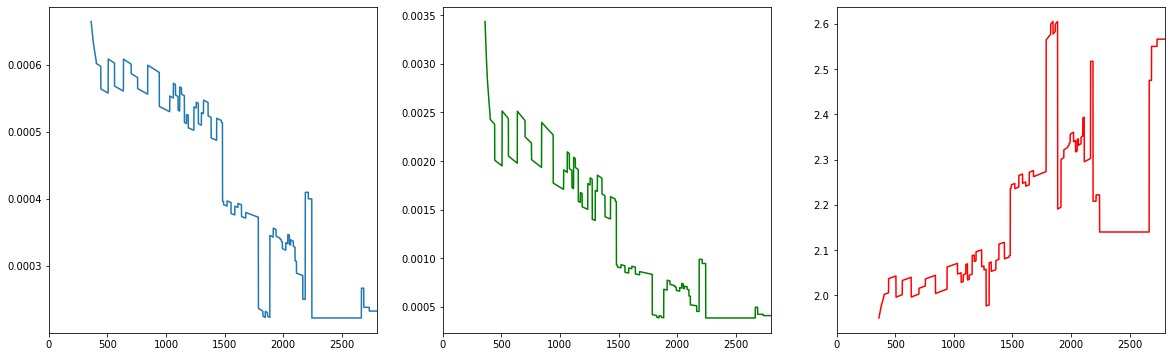

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

curves['2'].DTC.plot(ax=ax1)
curves['2'].DTS.plot(ax=ax2, color='green')
curves['2'].RHOB.plot(ax=ax3, color='red')
fig.show()

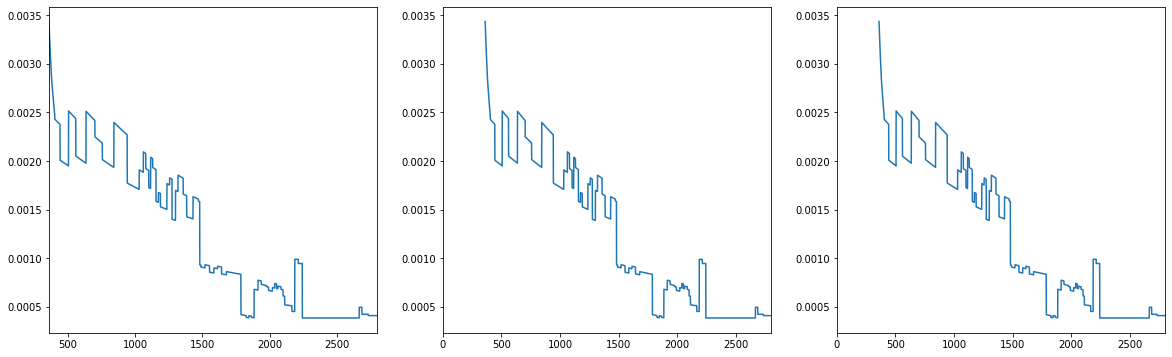

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
curves['1'].DTS.plot(ax=ax1)
curves['2'].DTS.plot(ax=ax2)
curves['3'].DTS.plot(ax=ax3)

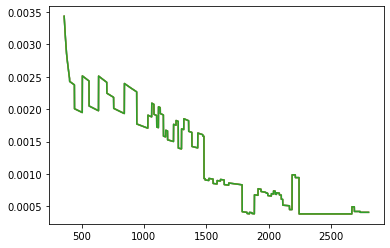

In [55]:
plt.plot(curves['1'].DTS)
plt.plot(curves['2'].DTS)
plt.plot(curves['3'].DTS)

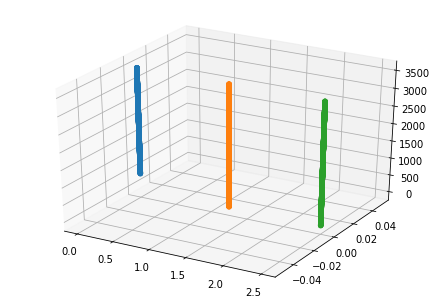

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(curves['1'].x, curves['1'].y, curves['1'].depth)
ax.scatter(curves['2'].x, curves['2'].y, curves['2'].depth)
ax.scatter(curves['3'].x, curves['3'].y, curves['3'].depth)